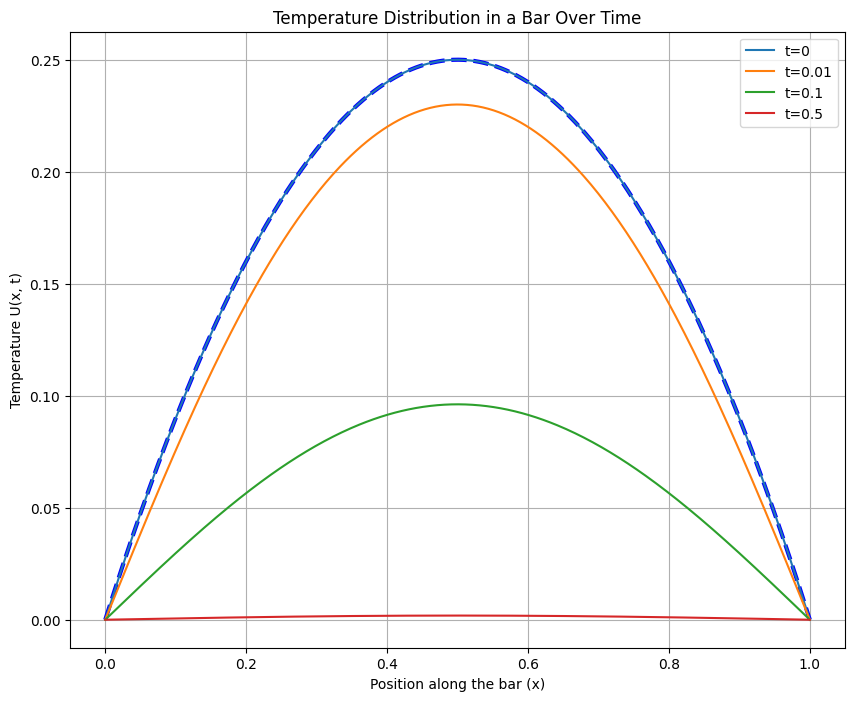

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

# Parameters
a = 1
L = 1 # Length of bar
N = 20  # Number of terms in the series
times = [0, 0.01, 0.1, 0.5]  # Different times at which to plot U(x, t)

# Function to define the intial temperature profile (t=0)
def init_profile(x,L):
    return x * (L - x)

# Function to integrate to find B_n
def integrand(x, n, L):
    return init_profile(x,L) * np.sin(n * np.pi * x / L)

# Calculate coefficients B_n
B_n = np.zeros(N+1)
for n in range(1, N+1):
    result, _ = quad(integrand, 0, L, args=(n, L))
    B_n[n] = 2/L * result

# Define U(x, t)
def U(x, t, L, a, B_n, N):
    sum_terms = 0
    for n in range(1, N+1):
        sum_terms += B_n[n] * np.sin(n * np.pi * x / L) * np.exp(-(n * np.pi / L)**2 * a * t)
    return sum_terms

# Plotting
x_values = np.linspace(0, L, 400)
plt.figure(figsize=(10, 8))
plt.plot(x_values, init_profile(x_values,L), linewidth = 3, linestyle = 'dashed', color = 'b' )
for t in times:
    plt.plot(x_values, [U(x, t, L, a, B_n, N) for x in x_values], label=f't={t}')

plt.title('Temperature Distribution in a Bar Over Time')
plt.xlabel('Position along the bar (x)')
plt.ylabel('Temperature U(x, t)')
plt.legend()
plt.grid(True)
plt.show()